In [8]:
import pandas as pd

# open output.csv file
df = pd.read_csv('output.csv')

# print column names
print(df.columns)


# print first 5 rows
df.head()


Index(['Name', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Scientific Name', 'Quote', 'Text', 'Name Of Young', 'Group Behavior',
       'Fun Fact', 'Estimated Population Size', 'Biggest Threat',
       'Most Distinctive Feature', 'Other Name(s)', 'Gestation Period',
       'Habitat', 'Diet', 'Lifestyle', 'Common Name', 'Location', 'Slogan',
       'Color', 'Skin Type', 'Top Speed', 'Lifespan', 'Weight', 'Length',
       'Age of Sexual Maturity', 'Age of Weaning', 'Predators', 'Type',
       'Height', 'Temperament', 'Age Of Independence', 'Distinctive Feature',
       'Wingspan', 'Incubation Period', 'Age Of Fledgling', 'Nesting Location',
       'Migratory', 'Venomous', 'Aggression', 'Origin', 'Average Clutch Size',
       'Special Features', 'Average Spawn Size', 'Age of Molting',
       'Optimum pH Level', 'Optimum PH Level'],
      dtype='object')


,Name,Kingdom,Phylum,Class,Order,Family,Genus,Scientific Name,Quote,Text,...,Migratory,Venomous,Aggression,Origin,Average Clutch Size,Special Features,Average Spawn Size,Age of Molting,Optimum pH Level,Optimum PH Level
0,Aardvark,Animalia,Chordata,Mammalia,Tubulidentata,Orycteropodidae,Orycteropus,Orycteropus afer,Can move up to 2ft of soil in just 15 seconds!,Aardvarks are small pig-like mammals that are ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aardwolf,Animalia,Chordata,Mammalia,Carnivora,Hyaenidae,Proteles,Proteles cristata,The aardwolf has five toes on its front paws,“Aardwolves play a positive role in the ecosys...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abyssinian Guinea Pig,Animalia,Chordata,Mammalia,Rodentia,Caviidae,Cavia,Cavia porcellus,They are one of the oldest breeds of guinea pig,“ Abyssinian guinea pigs are one of the oldest...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abyssinian,Animalia,Chordata,Mammalia,Carnivora,Felidae,Felis,Felis catus,"The breed may be a mix of Burmese, Siamese, an...",Perhaps too much emphasis is given to the unce...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acadian Flycatcher,Animalia,Chordata,Aves,Passeriformes,Tyrannidae,Empidonax,Empidonax virescens,Their nests are sloppily held together and hav...,“ Search for these birds in the mid-story of t...,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['Mammalia' 'Aves' 'Insecta' 'Reptilia' 'Amphibia' 'Actinopterygii'
 'Allosauridae' 'Malacostraca' 'Dicraeosauridae' nan 'Arachnida'
 'Sauropoda' 'Chondrichthyes' 'Radiodonta' 'Polychaeta'
 'Archaeopterygidae' 'Argentinosaurus' 'Diplopoda' 'Gastropoda'
 'Maxillopoda' 'Cephalopoda' 'Cubozoa' 'Brachiosauridae' 'Diplodocidae'
 'Siluriformes' 'Chilopoda' 'Cephalaspis' 'Amniota' 'Ceratosauridae'
 'Dinosauria' 'Polyplacophora' 'Bivalvia' 'Sarcopterygii' 'Theropoda'
 'Anthozoa' 'Squamata' 'Araneae' 'Passeriformes' 'Deinocheiridae'
 'Sphenacodontidae' 'Branchiopoda' 'Trichoplacoidea' 'Crocodilia'
 'Clitellata' 'Scansoriopterygidae' 'Ornithischia' 'Eurypterida'
 'Crinoidea' 'Pleuronechthyidae' 'Hydrozoa' 'Myxini' 'Myllokunmingiida'
 'Xenoturbellida' 'Turbellaria' 'Pterosauria' 'Ichthyostegalia'
 'Scyphozoa' 'Hyperoartia' 'Decapoda' 'Lystrosauridae' '†Ornithischia'
 'Megatheriidae' 'Dromaeosauridae' 'Vahlkampfiidae' 'Opabiniidae'
 '†Ornithomimidae' 'Ostracoda' 'Melittidae' 'Proboscidea' 'Ornithi

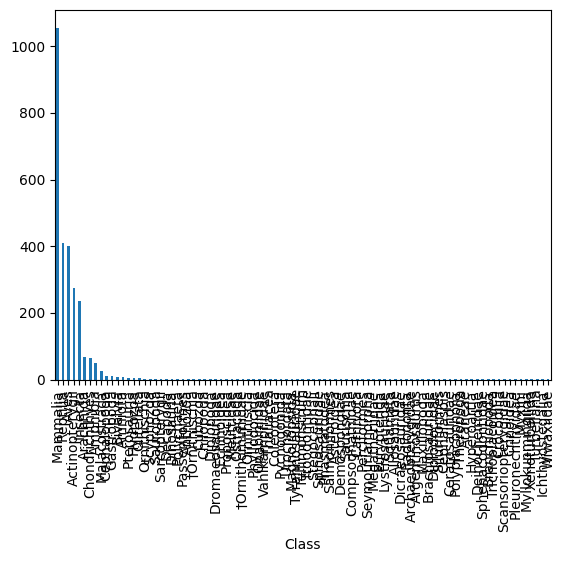

In [37]:
# make a diagram of the class of the animals
df['Class'].value_counts().plot(kind='bar')

# print all the unique classes of the animals
print(df['Class'].unique())


<AxesSubplot:>

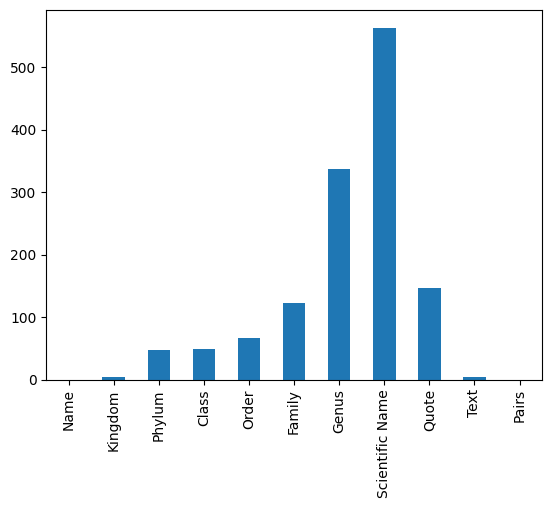

In [38]:
# show a diagram how many missing values there is for each column
df.isnull().sum().plot(kind='bar')


In [39]:
# from pairs make a scatter plot of the data of each pair occurence
from pandas.plotting import scatter_matrix
import ast

pairs = {}

# Iterate through each row in the 'Pairs' column
for row in df['Pairs']:
    row_list = ast.literal_eval(row)
    
    # Iterate through each pair in the row
    for pair in row_list:
        # Add the pair to the set
        if pair[0] not in pairs:
            pairs[pair[0]] = 1
        else:
            pairs[pair[0]] = pairs[pair[0]] + 1

# Print the set of pairs
print(pairs)
# scatter_matrix(pairs, figsize=(10, 10))


{'Prey': 1408, 'Name Of Young': 1247, 'Group Behavior': 1493, 'Fun Fact': 2352, 'Estimated Population Size': 946, 'Biggest Threat': 1336, 'Most Distinctive Feature': 1541, 'Other Name(s)': 1100, 'Gestation Period': 810, 'Habitat': 1692, 'Diet': 2519, 'Average Litter Size': 600, 'Lifestyle': 1232, 'Common Name': 1587, 'Number Of Species': 1076, 'Location': 1155, 'Slogan': 698, 'Group': 539, 'Color': 2380, 'Skin Type': 2363, 'Top Speed': 755, 'Lifespan': 2147, 'Weight': 1843, 'Length': 1582, 'Age of Sexual Maturity': 859, 'Age of Weaning': 402, 'Litter Size': 781, 'Predators': 1413, 'Type': 1182, 'Height': 617, 'Temperament': 542, 'Age Of Independence': 210, 'Favorite Food': 981, 'Distinctive Feature': 735, 'Training': 117, 'Main Prey': 771, 'Wingspan': 407, 'Incubation Period': 440, 'Age Of Fledgling': 170, 'Nesting Location': 439, 'Migratory': 222, 'Venomous': 784, 'Aggression': 809, 'Origin': 360, 'Average Clutch Size': 261, 'Special Features': 263, 'Diet for this Fish': 160, 'Average

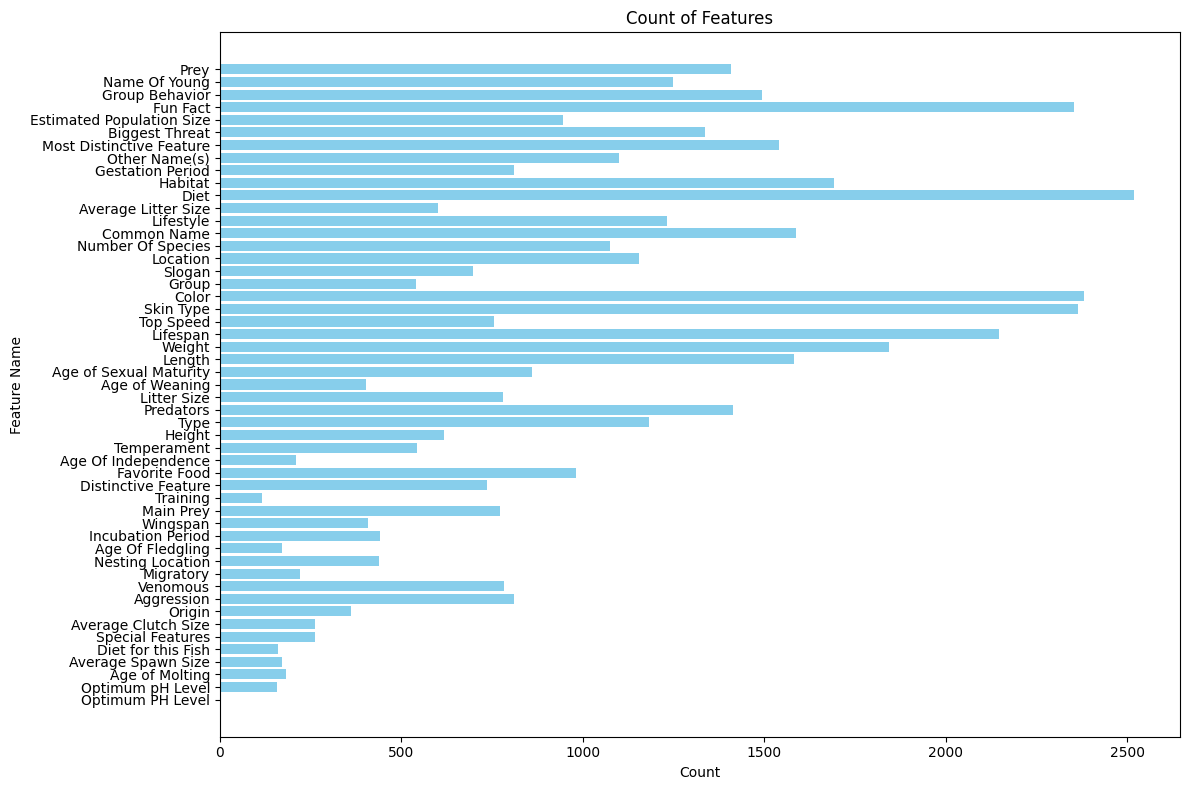

In [40]:
# make a plot of the pairs map

import matplotlib.pyplot as plt

# Extract the feature names and their corresponding counts
feature_names = list(pairs.keys())
feature_counts = list(pairs.values())

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Feature Name')
plt.title('Count of Features')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest count at the top
plt.tight_layout()

# Display the plot
plt.show()

In [41]:
df['Quote']

0          Can move up to 2ft of soil in just 15 seconds!
1            The aardwolf has five toes on its front paws
2         They are one of the oldest breeds of guinea pig
3       The breed may be a mix of Burmese, Siamese, an...
4       Their nests are sloppily held together and hav...
                              ...                        
2773               There are around 75 different species!
2774    Zokors are expert diggers. They burrow tunnels...
2775           The offspring of Zebra and Donkey parents!
2776          The offspring of a Zebra and Horse parents!
2777    The breed often changes colors throughout its ...
Name: Quote, Length: 2778, dtype: object

In [42]:
# show every Canis lupus
df[df['Scientific Name'] == 'Canis lupus']

,Name,Kingdom,Phylum,Class,Order,Family,Genus,Scientific Name,Quote,Text,Pairs
31,Aidi,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,The Aidi's cheerful personality and relaxed te...,Aidi dogs are rarely seen in other regions out...,"[('Name Of Young', 'Puppy'), ('Fun Fact', ""The..."
32,Ainu,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,Ainu dogs are natural hunters and will protect...,"Also known as Hokkaido dogs or Seta dogs, Ainu...","[('Fun Fact', 'Ainu dogs are natural hunters a..."
34,Airedoodle,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,This is a great pooch for rough-housing and on...,Airedoodles have learned how to ride a skatebo...,"[('Fun Fact', 'This is a great pooch for rough..."
36,Akita Shepherd,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,The Akita Shepherd descends from a lineage of ...,"As a mix between two working breeds, the Akita...","[('Fun Fact', 'The Akita Shepherd descends fro..."
37,Akita,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,"Although originating from Japan, the Akita has...",The famous disability rights activist Helen Ke...,"[('Fun Fact', 'Although originating from Japan..."
...,...,...,...,...,...,...,...,...,...,...,...
2734,Yakutian Laika,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,The Yakute people were likely the first to use...,The Yakute people were likely the first to use...,"[('Fun Fact', 'The Yakute people were likely t..."
2761,Yorkie Bichon,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,Yorkie Bichons can come in a wide range of col...,Yorkie Bichons can come in a wide range of col...,"[('Fun Fact', 'Yorkie Bichons can come in a wi..."
2762,Yorkie Poo,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,The Yorkie-Poo originated from the hybrid pood...,Did you know that a full grown Yorkiepoo is am...,"[('Fun Fact', 'The Yorkie-Poo originated from ..."
2763,Yorkshire Terrier,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis lupus,Yorkies hold many records for smallest dog.,"The Yorkshire Terrier, a.k.a. the Yorkie, is t...","[('Fun Fact', 'Yorkies hold many records for s..."
